# Eight Queens
To illustrate the 8 Queens problem we first create a class to represent a possible boardstate and all the possible successors to this boardstate. The successor to a board state is every other boardstate that can be reached by moving one Queen to another square in the same column that it previously resided in. Each Queen is marked `×` if she is attacked by at least one other Queen and `♛` if she is not.

In [1]:
from random import randrange, uniform, choice, seed

class Board:
    def __init__(self, state=None):
        self.state = state if state is not None else ''.join(str(randrange(8)) for _ in range(8))
        self.util = 28 - sum(self.targets(int(self[i]), i, int(self[j]), j) 
                             for i in range(len(self.state)) for j in range(len(self.state)) if i != j)//2
                
    @staticmethod
    def targets(ax: int, ay: int, bx: int, by: int) -> bool:
        return (ax == bx or ay == by or abs(ax - bx) == abs(ay - by)) and (ax, ay) != (bx, by)
    
    def __add__(self, other): # Defines Reproduction
        crossover = randrange(len(self.state))
        return Board(self[:crossover] + other[crossover:])
    
    def __getitem__(self, idx) -> str:
        return self.state[idx]
    
    def attacked(self, idx) -> bool:
        return any(self.targets(*idx, int(self[i]), i) for i in range(8))
    
    def __repr__(self) -> str:
        return f'Board[state={self.state}|util={self.util}]'
    
    def __len__(self) -> int:
        return len(self.state)
    
    def __str__(self) -> str:
        l = ['┌───┬───┬───┬───┬───┬───┬───┬───┐']
        for i in range(8):
            l.append('│ ' + ' │ '.join(('×' if self.attacked((int(self[j]), j)) else '♛') 
                                       if self[j] == str(i) else ' ' for j in range(len(self.state))) + ' │')
            if i < 7:
                l.append('├───┼───┼───┼───┼───┼───┼───┼───┤')
        l.append('└───┴───┴───┴───┴───┴───┴───┴───┘')
        return '\n'.join(l)
    
    def successors(self):
        for i in range(8):
            for j in range(8):
                if j != int(self[i]):
                    yield Board(self[:i] + str(j) + self[i+1:])
    
    def mutation(self):
        idx = randrange(len(self))
        gene = int(self[idx])
        mutation = str(choice(list(range(gene)) + list(range(gene+1, len(self)))))
        return Board(self[:idx] + mutation + self[idx+1:])
    


print(Board('02467531'))
print(Board('13572064'))

┌───┬───┬───┬───┬───┬───┬───┬───┐
│ × │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │ ♛ │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │ ♛ │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │ × │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │ ♛ │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │ × │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │ × │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │ × │   │   │   │
└───┴───┴───┴───┴───┴───┴───┴───┘
┌───┬───┬───┬───┬───┬───┬───┬───┐
│   │   │   │   │   │ ♛ │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│ ♛ │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │ ♛ │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │ ♛ │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │ ♛ │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │ ♛ │   │   │   │   │   │
├───┼───┼───┼─

## Genetic Algorithm

We use the genetic algorithm to simulate evolution. Each individual is picked for reproduction with a probability relative to its fitness. The Reproduction ist already defined in the `entity_class` as the `+` operator. The child will mutate with a small probability.

Board[state=16470534|util=25]
Board[state=20413637|util=25]
Board[state=05117736|util=25]
Board[state=16470535|util=26]
Board[state=70652074|util=25]
Board[state=70612064|util=25]
Board[state=71660045|util=25]
Board[state=70612564|util=25]
Board[state=70612574|util=26]
Board[state=20617164|util=25]
┌───┬───┬───┬───┬───┬───┬───┬───┐
│   │ ♛ │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │ × │   │ × │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│ ♛ │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │ × │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │ × │   │   │   │ × │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │ × │   │   │   │
└───┴───┴───┴───┴───┴───┴───┴───┘
Board[state=20617163|util=25]
Board[state=74612063|util=25]
Board[state=70261673|util=25]
Board[state=26170364|util=27]
Bo

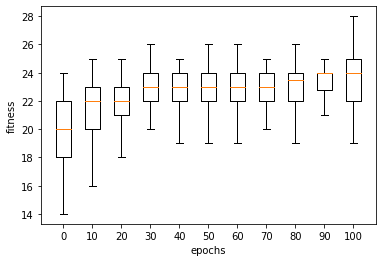

┌───┬───┬───┬───┬───┬───┬───┬───┐
│   │   │   │   │ ♛ │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │ ♛ │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│ ♛ │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │ ♛ │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │ ♛ │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │ ♛ │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │ ♛ │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │ ♛ │   │   │   │   │
└───┴───┴───┴───┴───┴───┴───┴───┘


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from math import ceil


seed(1)


class Evolution:
    def __init__(self, entity_class, size: int, fitness, goal) -> None:
        self.fitness = fitness
        self.goal = goal
        self.population = sorted([entity_class() for _ in range(size)], key=self.fitness, reverse=True)
        self.update()
    
    def update(self) -> None:
        self.total_fitness = sum(self.fitness(entity) for entity in self.population)
    
    def __iter__(self):
        for entity in self.population:
            yield entity
    
    def __getitem__(self, idx):
        return self.population[idx]
    
    def select(self):
        pivot = uniform(0, 1) * self.total_fitness
        pointer = 0
        for i, entity in enumerate(self):
            pointer += self.fitness(entity)
            if pointer >= pivot:
                return self[i-1]
        return self[-1]
    
    def mutate(self, entity, mutation_rate):
        if uniform(0, 1) < mutation_rate:
            return entity.mutation()
        else:
            return entity

    def __call__(self, epochs: int, mutation_rate=0.2):
        number_of_boxplots = 10
        boxplot_width = 5
        for epoch in range(epochs):
            if (epoch % (epochs//number_of_boxplots)) == 0:
                try:
                    print(best)
                except:
                    pass
                plt.boxplot([self.fitness(x) for x in self.population], 
                            positions=[epoch], widths=boxplot_width, showfliers=False)
            population = []
            for _ in range(len(self.population)):
                parent_one = self.select()
                parent_two = self.select()
                child = parent_one + parent_two
                child = self.mutate(child, mutation_rate)
                population.append(child)
            self.population = sorted(population, key=self.fitness, reverse=True)
            self.update()
            best = self.population[0]
            print(repr(best))
            if self.goal(best):
                break
        
        plt.boxplot([self.fitness(x) for x in self.population], 
                    positions=[ceil(epoch/number_of_boxplots)*number_of_boxplots], widths=boxplot_width, showfliers=False)
        plt.xlabel('epochs')
        plt.ylabel('fitness')
        plt.show()
        return best
                

pool = Evolution(entity_class=Board, size=100, goal=lambda x: x.util == 28, fitness=lambda x: x.util)
darwins_favorite = pool(100, mutation_rate=0.02)
print(darwins_favorite)

It seems evident that the current version of the Genetic Algorithm is not very efficent. after a few epochs it reaches a plateau from where it only finds a solution by luck. I will therefore try to improve the performance by introducing a softmax to our fitness function. It is used to amplify the better results and it also normalizes the Fitnessscores which simplifies the selection process.
$$\sigma(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}$$

Board[state=42735061|util=25]
Board[state=24073162|util=26]
Board[state=44073162|util=26]
Board[state=54073162|util=27]
Board[state=14053162|util=27]
Board[state=14053162|util=27]
Board[state=14073162|util=27]
Board[state=54073162|util=27]
Board[state=14073162|util=27]
Board[state=14073162|util=27]
┌───┬───┬───┬───┬───┬───┬───┬───┐
│   │   │ ♛ │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│ × │   │   │   │   │ × │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │ ♛ │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │ ♛ │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │ ♛ │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │ ♛ │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │ ♛ │   │   │   │   │
└───┴───┴───┴───┴───┴───┴───┴───┘
Board[state=14073162|util=27]
Board[state=14073162|util=27]
Board[state=54073162|util=27]
Board[state=14073162|util=27]
Bo

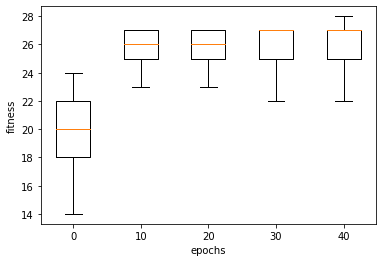

┌───┬───┬───┬───┬───┬───┬───┬───┐
│   │   │ ♛ │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │ ♛ │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │ ♛ │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │ ♛ │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │ ♛ │
├───┼───┼───┼───┼───┼───┼───┼───┤
│ ♛ │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │ ♛ │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │ ♛ │   │   │   │   │
└───┴───┴───┴───┴───┴───┴───┴───┘


In [3]:
from math import exp

seed(1)


class EvolutionSoftmax(Evolution):
    def update(self) -> None:
        self.total_fitness = sum(exp(self.fitness(entity)) for entity in self.population)
    
    def select(self):
        pivot = uniform(0, 1)
        pointer = 0
        for i, entity in enumerate(self):
            pointer += exp(self.fitness(entity))/self.total_fitness
            if pointer >= pivot:
                return self[i-1]
        return self[-1]
                

pool = EvolutionSoftmax(entity_class=Board, size=100, goal=lambda x: x.util == 28, fitness=lambda x: x.util)
darwins_favorite = pool(100, mutation_rate=0.4)
print(darwins_favorite)

The softmax function prioritised way more higly fitter individuals than the simple fitness function and allowed for a greater mutation rate.

## CSP

We define a class for Constraint Satisfaction Problems. It will not only contain the variables and there constraints but although their assignments. It although provides a functionality for AC3.


In [4]:
from copy import deepcopy


class CSP:
    def __init__(self, variables, constraints):
        self.variables = {var: None for var in variables.keys()}
        self.domain = {var: domain for var, domain in variables.items()}
        self.constraints = constraints
        self.neighbors = {var: [] for var in self}
        for nodes in constraints.keys():
            for i, node in enumerate(nodes):
                for j in nodes[:i]+nodes[i+1:]:
                    if j not in self.neighbors[node]:
                        self.neighbors[node].append(j)

    def __iter__(self):
        for var in self.variables.keys():
            yield var

    def __in__(self, key):
        if isinstance(key, tuple):
            return key in self.constraints.keys()
        else:
            return key in self.variables

    def __setitem__(self, key, val):
        self.variables[key] = val
        self.domain[key] = [val]

    def __getitem__(self, key):
        if isinstance(key, tuple):
            return self.constraints[key]
        else:
            return self.variables[key]

    def complete(self):
        return all(self.consistent(X) if self[X] is not None else False for X in self)
    
    def consistent(self, Xi):
        return all(self[Xi, Xj](Xi, Xj, self[Xi], self[Xj]) if self[Xj] is not None else
                   any(self[Xi, Xj](Xi, Xj, self[Xi], Dj) for Dj in self.domain[Xj]) for Xj in self.neighbors[Xi])

    def AC3(self, queue=None) -> bool:
        if queue is None:
            queue = list(self.constraints.keys())
        while queue:
            Xi, Xj = queue.pop()
            if self.revise(Xi, Xj):
                if not self.domain[Xi]:
                    return False
                for Xk in set(self.neighbors[Xi]) - {Xj}:
                    queue.append((Xk, Xi))
        return True

    def revise(self, Xi, Xj):
        revised = False
        for Di in list(self.domain[Xi]):
            if not any(self[Xi, Xj](Xi, Xj, Di, Dj) for Dj in self.domain[Xj]):
                self.domain[Xi].remove(Di)
                revised = True
        return revised

## Backtracking

In the following we define the variable order with `MinimumRemainingValues` and use `MaintainingArcConsistency` as inference method. Since we are interested in getting all results the domain order is not imporant, since it does not provide any methods for pruning the search tree. We then implement the Backtracking algorithm to search for all solutions of the eight queens problem. The function takes an argument `status` which searches for all sulution if set and performs an action given with the status argument with them. Instead of printing all solutions we will write them to a file `eight_queens_solutions.txt` to maintain readability.

In [5]:
def MRV(csp):
    return min((x for x in csp if csp[x] is None), key=lambda x: len(csp.domain[x]))
    

def MAC(csp, Xi):
    return csp.AC3(queue=list((Xi, Xj) for Xj in csp.neighbors[Xi]))
    
    
def Backtrack(csp, status=False, select=MRV, order_domain=lambda x: x, inference=MAC):
    if csp.complete():
        if status:
            status(csp)
        return csp
    var = select(csp)
    for val in order_domain(csp.domain[var]):
        restore = deepcopy(csp)
        csp[var] = val
        if csp.consistent(var) and inference(csp, var):
            if status:
                Backtrack(csp, status, select, order_domain, inference)
            else:
                result = Backtrack(csp, status, select, order_domain, inference)
                if result:
                    return result
        csp = restore
    return False

In [6]:
variables  = {idx: list(range(8)) for idx in range(8)}
constraints = {
    (i, j): lambda Xi, Xj, Di, Dj: abs(Xi - Xj) != abs(Di - Dj) and Di != Dj
    for i in range(8) for j in range(8) if i != j
}

with open('eight_queens_solutions.txt', 'w') as file:
    printing = lambda csp: print(Board(''.join(str(csp[var]) for var in csp)))
    writing = lambda csp: file.write(str(Board(''.join(str(csp[var]) for var in csp)))+'\n')
    
    queens = CSP(variables, constraints)
    Backtrack(queens, status=writing)
    
    queens = CSP(variables, constraints)
    printing(Backtrack(queens))

┌───┬───┬───┬───┬───┬───┬───┬───┐
│ ♛ │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │ ♛ │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │ ♛ │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │ ♛ │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │ ♛ │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │ ♛ │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │ ♛ │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │ ♛ │   │   │   │   │   │
└───┴───┴───┴───┴───┴───┴───┴───┘
